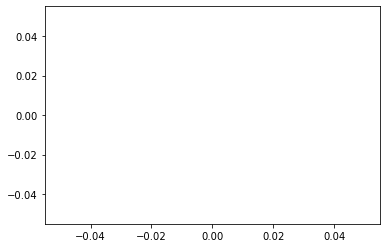

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
imdb = pd.read_csv('C:\\Users\\cR4zYD0G\\Documents\\quarentena_dados\\ml-latest-small\\movie_metadata.csv')
#imdb['color'].unique()
#imdb['color'].value_counts(normalize=True)
#imdb['director_name'].value_counts()
#imdb['director_name'].value_counts().tail(40)
#imdb['num_critic_for_reviews'].min()
#imdb['num_critic_for_reviews'].describe()
#imdb['num_critic_for_reviews'].plot(kind='hist')
#imdb['gross'].plot(kind='hist')
#sns.distplot(imdb['gross'])
#imdb.sort_values('gross', ascending=False).head()
#imdb.sort_values('gross', ascending=False).sample(10)
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
#len(color_or_bw)
color_or_bw['color_0_ou_1'] = (color_or_bw['color'] == 'Color') * 1
#color_or_bw.head()
#color_or_bw['color_0_ou_1'].value_counts()
#sns.scatterplot(data=color_or_bw, x='color_0_ou_1', y='gross')
#color_or_bw.groupby('color').mean()['gross']
#color_or_bw.groupby('color').mean()['imdb_score']
#color_or_bw.groupby('color').median()['imdb_score']
budget_gross = imdb[['budget', 'gross']].dropna().query('budget <= 0 or gross <= 0')
sns.scatterplot(data=budget_gross, x='budget', y='gross')